## Denoising example

* Code mostly from 
https://github.com/keras-team/keras/blob/master/examples/mnist_denoising_autoencoder.py

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

/home/sandro/anaconda2/envs/dl_ws/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 3.1 Generate Noisy data from Ground Truth images

In [2]:
# MNIST dataset
import hidden_code
from hidden_code import x_train, x_test

image_size = x_train.shape[1]

# Generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

input_shape = (image_size, image_size, 1)

## 3.2 Stack Layers to Build Model

In [3]:
model = hidden_code.build_model(input_shape)

# 3.3 Compile Model

In [4]:
from hidden_code import ssim_metric

In [5]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.adam(),
              metrics=[ssim_metric])

Keras callbacks access model

https://keunwoochoi.wordpress.com/2016/07/16/keras-callbacks/

# 3.4 Fit the Model

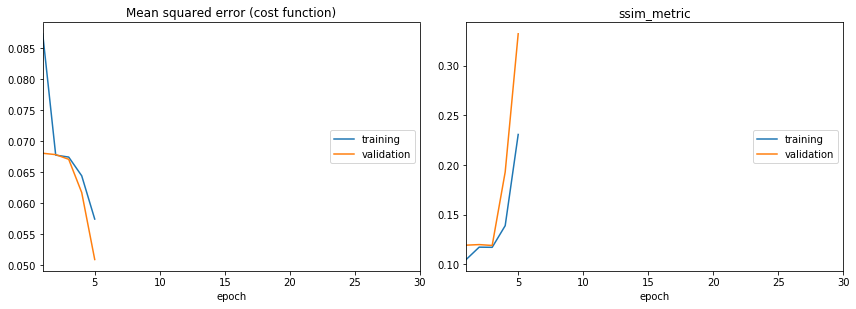

Epoch 6/30


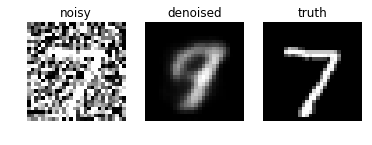

 5504/10000 [===============>..............] - ETA: 5s - loss: 0.0451 - ssim_metric: 0.3776

KeyboardInterrupt: 

In [6]:
from livelossplot import PlotLossesKeras
from hidden_code import ShowImageCallback
batch_size = 128

callbacks=[ShowImageCallback((x_test_noisy, x_test)), PlotLossesKeras()]
model.fit(x_train_noisy,
          x_train,
          validation_data=(x_test_noisy, x_test),
          epochs=30,
          batch_size=batch_size,
          verbose=1,
          callbacks=callbacks)

In [ ]:
x_test_noisy[0]